In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install calmap
import calmap
#import sys
#!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head(3)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total      Date  \
0       Health and beauty       74.69         7  26.1415  548.9715  1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200  3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255  3/3/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4

In [4]:
df.tail()

Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758      C  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313      A     Yangon        Member    Male   Food and beverages   
998  347-56-2442      A     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date   Time  Payment  \
995       40.35         1   2.0175    42.3675  1/29/2019  13:46  Ewallet   
996       97.38        10  48.6900  1022.4900   3/2/2019  17:16  Ewallet   
997       31.84         1   1.5920    33.4320   2/9/2019  13:22     Cash   
998       65.82         1   3.2910    69.1110  2/22/2019  15:33     Cash   
999       88.34         7  30.9190   649.2990  2/18/2019  13:28     Cash   

       cogs  gross margin percentage  gross income  Rating  
995   40.35                 4.761905        2.0175     6.2  
996  973.80                 4.761905       48.6900     4.4  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [9]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [10]:
df.set_index('Date',inplace = True) #Set date in the index column

In [11]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [12]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.220360e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

Task 2 : Univariate Analysis

Q. What does the distribution of customer ratings look like? Is it skewed?

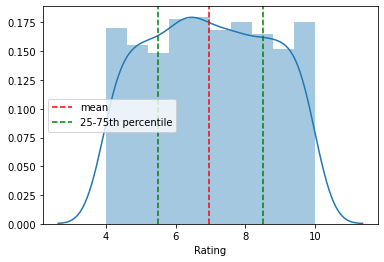

In [13]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

#distributions seems to be relatively uniform without any skew in the left or right direction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002787135AC70>,
      dtype=object)

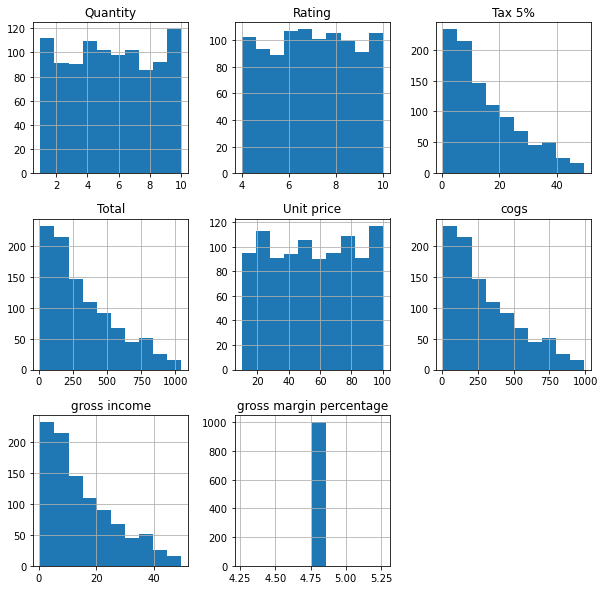

In [14]:
df.hist(figsize=(10,10))

Q. Do aggregate sales numbers differ by much between branches?

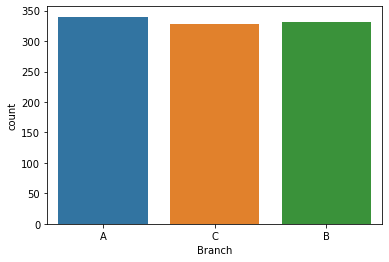

In [15]:
sns.countplot(df['Branch'])

In [16]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

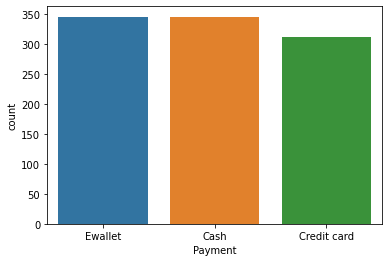

In [17]:
sns.countplot(df['Payment'])

In [18]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Task 3 : Bivariate Analysis

Q. Is there a relationship between gross income and customer rating?

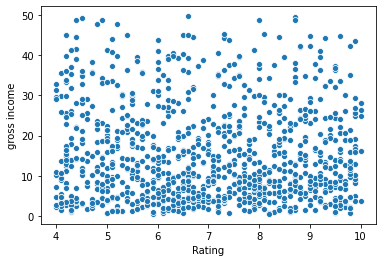

In [19]:
sns.scatterplot(df['Rating'], df['gross income'])

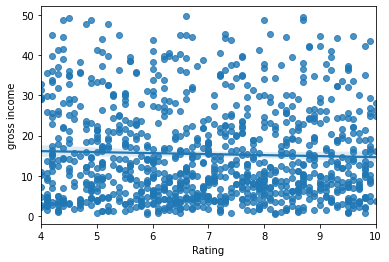

In [20]:
sns.regplot(df['Rating'], df['gross income'])

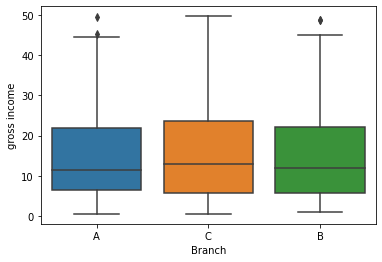

In [21]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

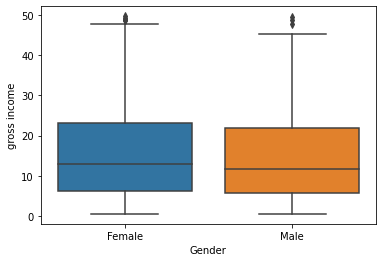

In [22]:
sns.boxplot(df['Gender'], df['gross income'])

Q. Is there a noticeable time trend in gross income

In [23]:
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.750000  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  6.090909  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

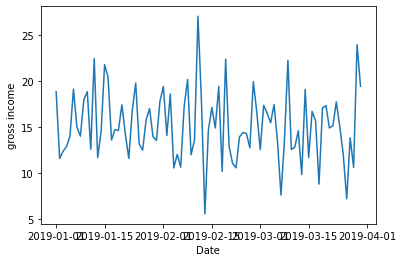

In [24]:
sns.lineplot(x = df.groupby(df.index).mean().index, y = df.groupby(df.index).mean()['gross income'])

#we can see no trend

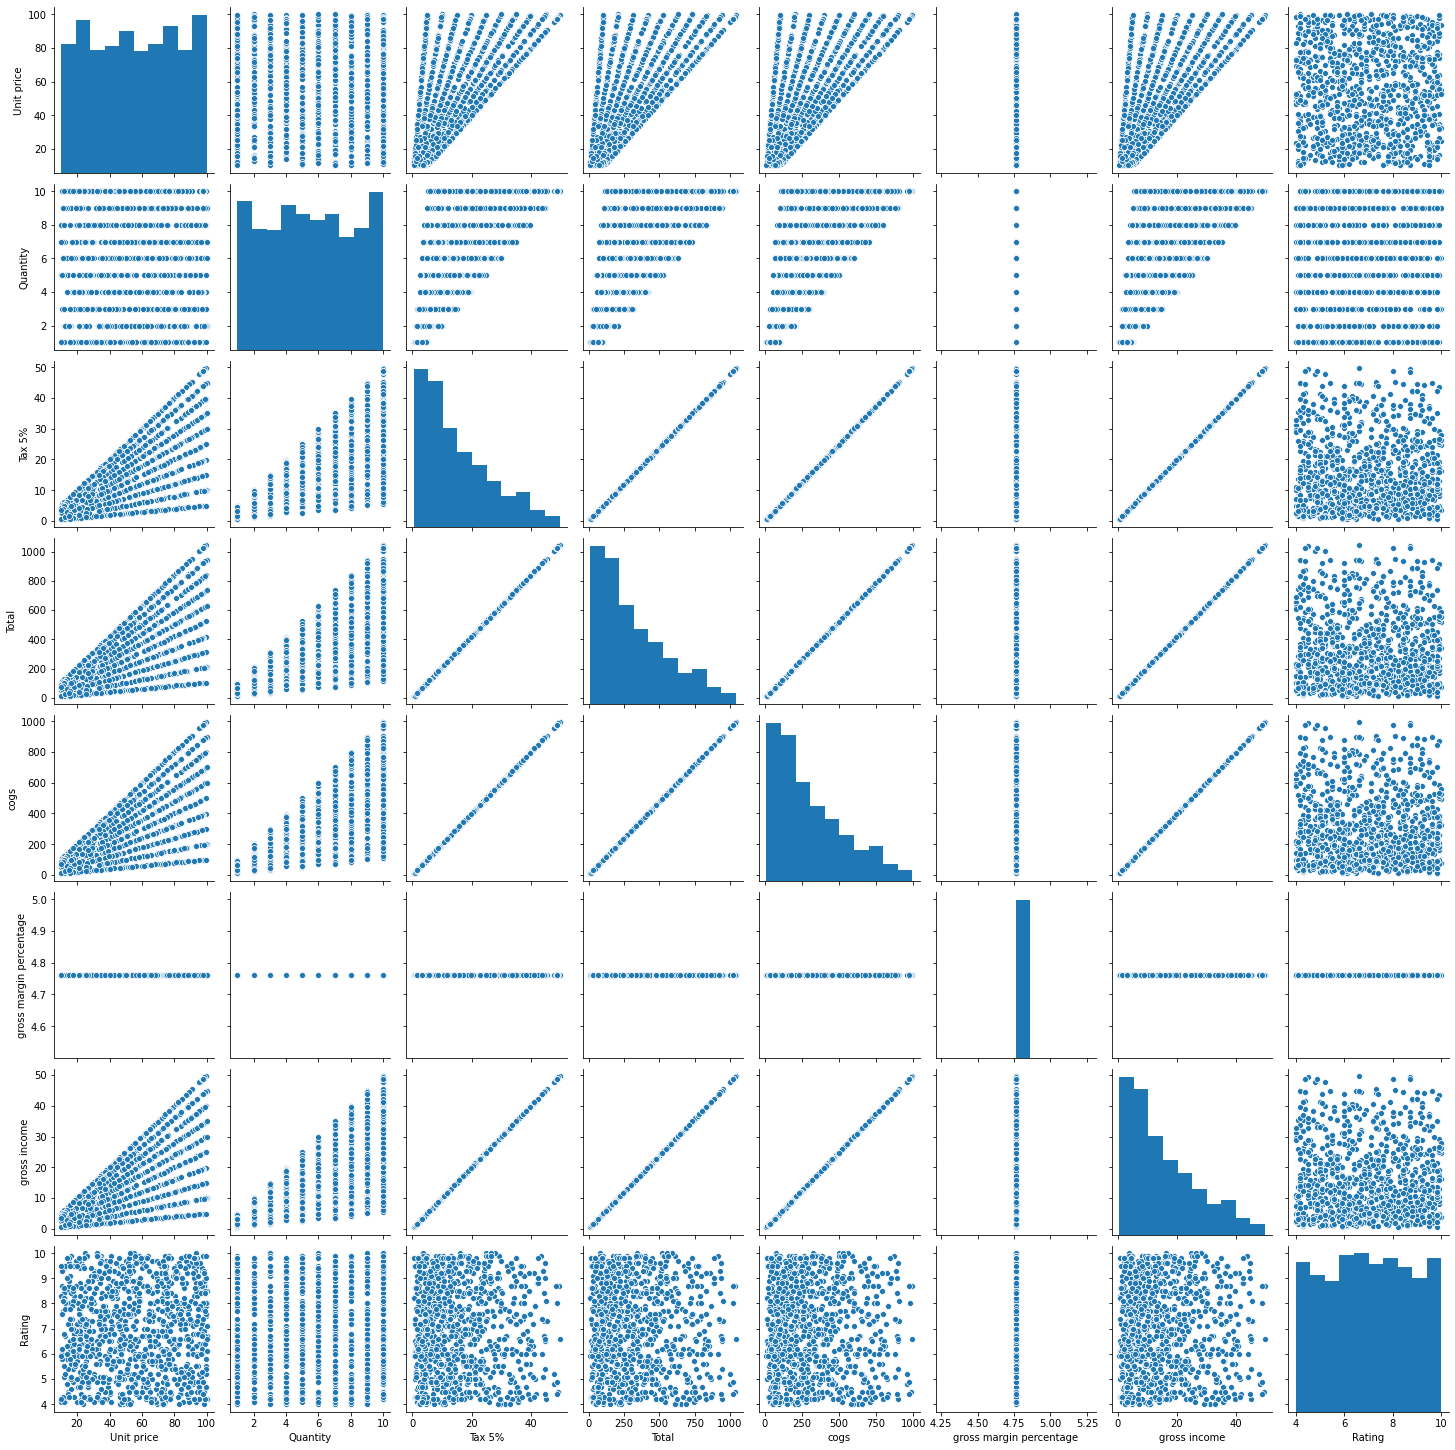

In [27]:
sns.pairplot(df)

#to plot all combinations, preferred for small datasets

Dealing with duplicate rows and missing values

To check duplicate rows

In [28]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-01-29    False
2019-03-02    False
2019-02-09    False
2019-02-22    False
2019-02-18    False
Length: 1000, dtype: bool

In [30]:
df.duplicated().sum()

0

In [35]:
df[df.duplicated() == True]

#no duplicated rows in our dataset

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [39]:
#To drop the duplicate rows

df.drop_duplicates(inplace = True)

To check missing values

In [41]:
df.isna().sum()

#no value is missing

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [42]:
#Ratio

df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

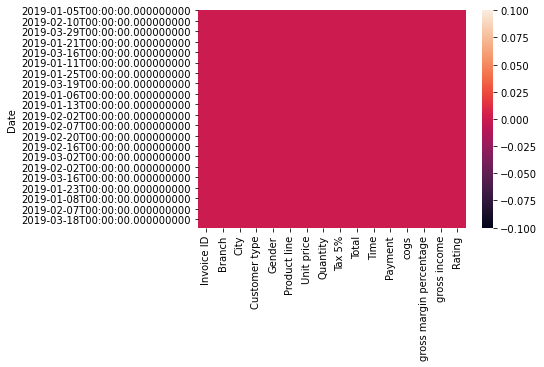

In [44]:
sns.heatmap(df.isnull())

Dealing with missing values

In [46]:
#replacing with mean

df.fillna(df.mean(), inplace = True) #for numeric columns only

In [50]:
#gives mode in first row

df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                    10
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage                 4.7619
gross income                             4.154
Rating                                       6
Name: 0, dtype: object

In [53]:
df.fillna(df.mode().iloc[0], inplace = True)

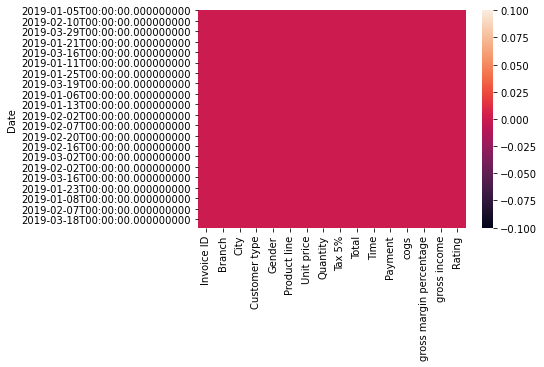

In [54]:
sns.heatmap(df.isnull())

In [56]:
prof = ProfileReport(df)
prof

Correlation Analysis

# WHAT DOES THIS MEAN ????????????????????

In [59]:
#use numpy to find correlation between 2 columns

np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [60]:
np.corrcoef(df['gross income'],df['Rating'])[1][0]

-0.03644170499701836

Rounding

In [63]:
np.round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [65]:
df.corr()

Unit price      Quantity        Tax 5%  \
Unit price               1.000000e+00  1.077756e-02  6.339621e-01   
Quantity                 1.077756e-02  1.000000e+00  7.055102e-01   
Tax 5%                   6.339621e-01  7.055102e-01  1.000000e+00   
Total                    6.339621e-01  7.055102e-01  1.000000e+00   
cogs                     6.339621e-01  7.055102e-01  1.000000e+00   
gross margin percentage -6.998957e-16 -3.849075e-16  2.461896e-16   
gross income             6.339621e-01  7.055102e-01  1.000000e+00   
Rating                  -8.777507e-03 -1.581490e-02 -3.644170e-02   

                                Total          cogs  gross margin percentage  \
Unit price               6.339621e-01  6.339621e-01            -6.998957e-16   
Quantity                 7.055102e-01  7.055102e-01            -3.849075e-16   
Tax 5%                   1.000000e+00  1.000000e+00             2.461896e-16   
Total                    1.000000e+00  1.000000e+00             2.408632e-16   
cogs                     1.000000e+00  1.000000e+00             1.439279e-15   
gross margin percentage  2.408632e-16  1.439279e-15             1.000000e+00   
gross income             1.000000e+00  1.000000e+00             2.461896e-16   
Rating                  -3.644170e-02 -3.644170e-02             2.042714e-15   

                         gross income        Rating  
Unit price               6.339621e-01 -8.777507e-03  
Quantity                 7.055102e-01 -1.581490e-02  
Tax 5%                   1.000000e+00 -3.644170e-02  
Total                    1.000000e+00 -3.644170e-02  
cogs                     1.000000e+00 -3.644170e-02  
gross margin percentage  2.461896e-16  2.042714e-15  
gross income             1.000000e+00 -3.644170e-02  
Rating                  -3.644170e-02  1.000000e+00

In [67]:
np.round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.71   0.71  0.71   
Tax 5%                         0.63      0.71    1.00   1.00  1.00   
Total                          0.63      0.71    1.00   1.00  1.00   
cogs                           0.63      0.71    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.71    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.71   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

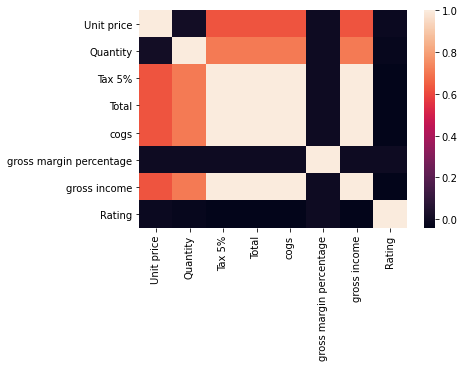

In [64]:
sns.heatmap(np.round(df.corr(),2))

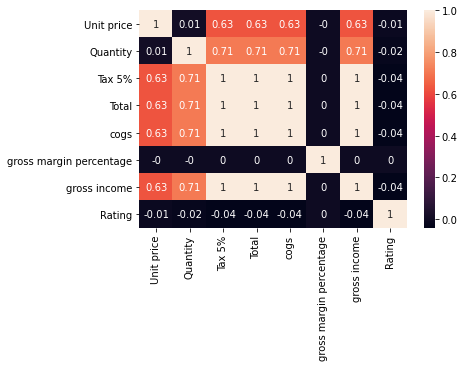

In [69]:
sns.heatmap(np.round(df.corr(),2),annot = True)

#0 is least and 1 is most